# Avocado Project

## Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [10]:
adf=pd.read_csv(r'C:\Users\HP\avocado.csv')
adf

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


From above we can see that there are no null values present, and we are using region as the label now for the first part of the question hence its a classification problem


We will drop the unnamed column as its not useful for the prediction.

In [11]:
adf.drop(columns=['Unnamed: 0'],inplace=True)
adf.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [12]:
adf['Year'], adf['Month'], adf['date']=adf['Date'].str.split('-').str

adf['Year']=adf['Year'].astype(int)
adf['Month']=adf['Month'].astype(int)
adf['date']=adf['date'].astype(int)
adf.drop(columns=['Date','year'], inplace=True)
adf

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


## Exploratory Data Analysis (EDA)

In [82]:
adf.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,date
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


From above details we can notice the following things-
1) Outliers may be present as 75% values and max values have huge difference between them
2) Skewness is present in some columns
3) Standard deviation and mean of each column

## Visualisation
### Univariate Analysis

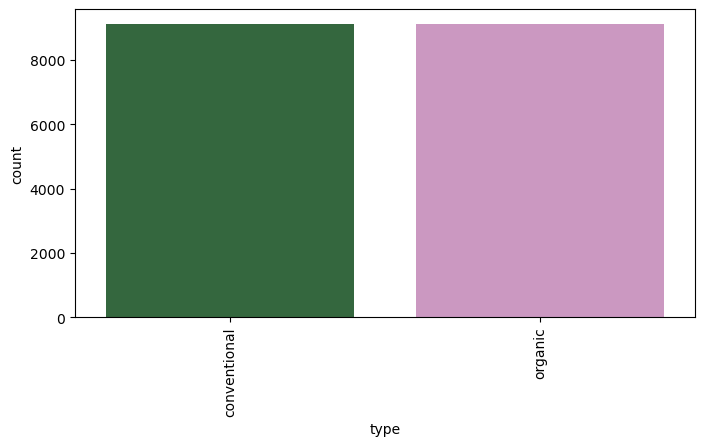

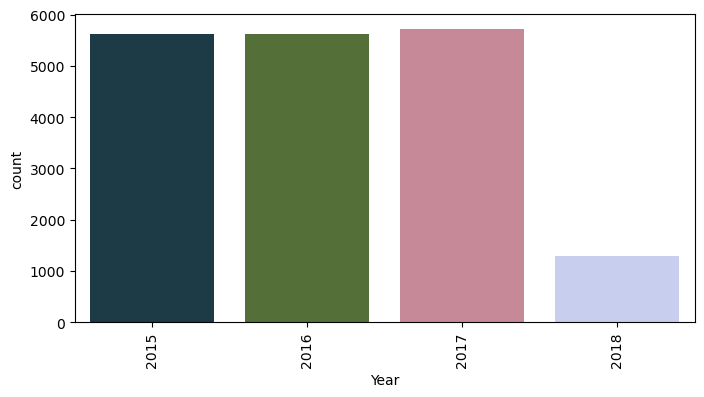

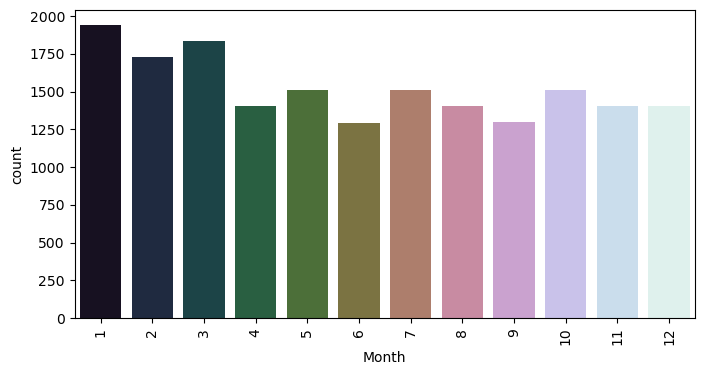

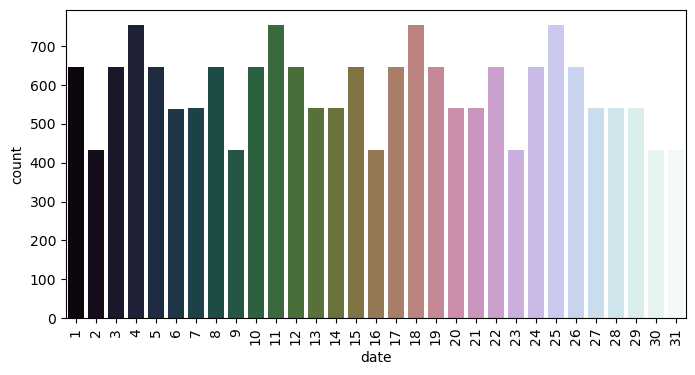

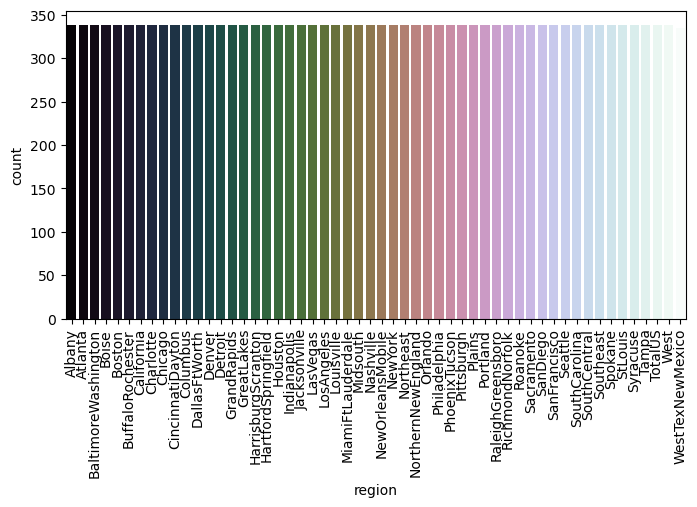

In [85]:
countcol=[adf['type'], adf['Year'],adf['Month'],adf['date'],adf['region']]
for i in countcol:
    pt.figure(figsize=(8,4))
    pt.xticks(rotation=90)
    sb.countplot(x=i,data=adf,palette='cubehelix')

### Bivariate Analysis

<Axes: xlabel='4770', ylabel='AveragePrice'>

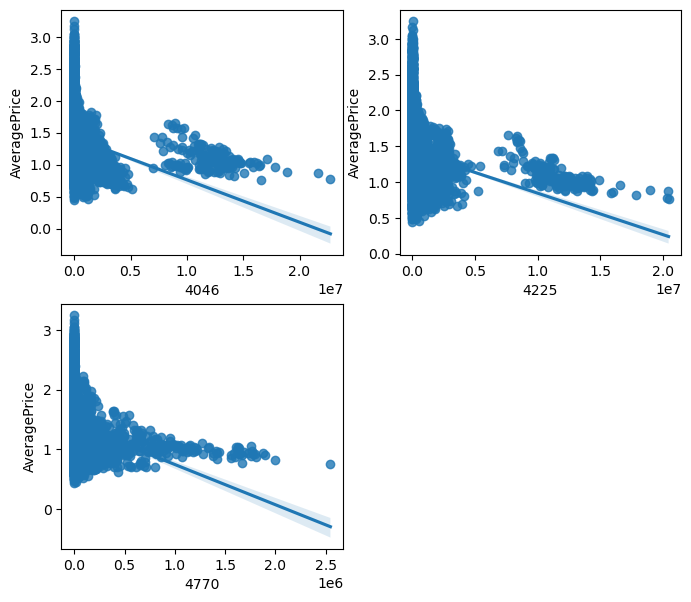

In [182]:
pt.figure(figsize=(8,7))

pt.subplot(221)
sb.regplot(data=adf,y='AveragePrice',x='4046')
pt.subplot(222)
sb.regplot(data=adf,y='AveragePrice',x='4225')
pt.subplot(223)
sb.regplot(data=adf,y='AveragePrice',x='4770')

<Axes: xlabel='Year', ylabel='AveragePrice'>

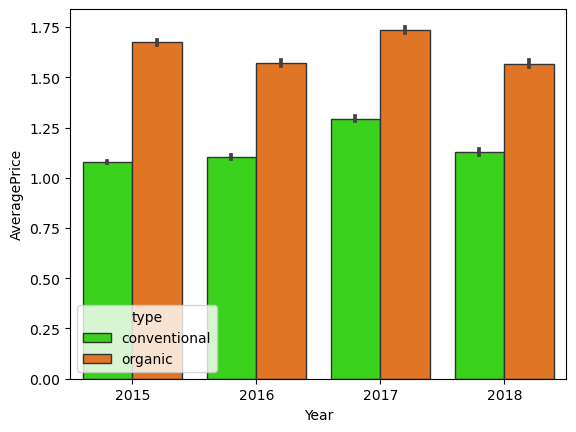

In [132]:
sb.barplot(x='Year',y='AveragePrice',hue='type',data=adf,palette='gist_ncar',edgecolor='0.2')

From the above graph we can see that organic avocados have more Average Price than the conventional ones

<Axes: xlabel='Year', ylabel='Total Volume'>

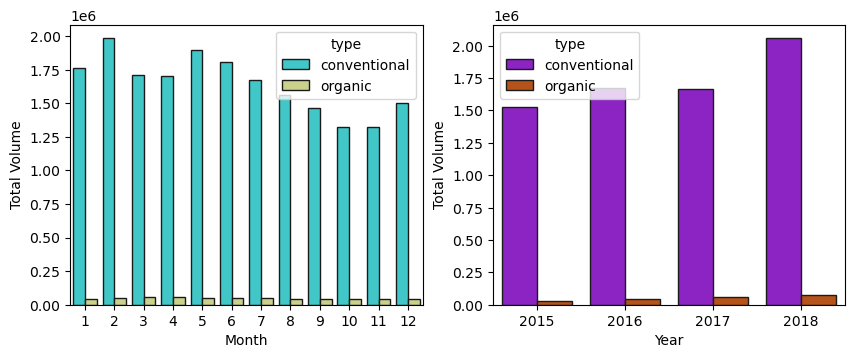

In [180]:
pt.figure(figsize=(10,8))
pt.subplot(221)
sb.barplot(x='Month',y='Total Volume',hue='type',data=adf,palette='rainbow',edgecolor='0.1',errorbar=None)
pt.subplot(222)
sb.barplot(x='Year',y='Total Volume',hue='type',data=adf,palette='gnuplot',edgecolor='0.1',errorbar=None)

From the above graph we can see that conventional avocados are sold more than the organic ones in every month and every year.

<Axes: xlabel='Total Volume', ylabel='region'>

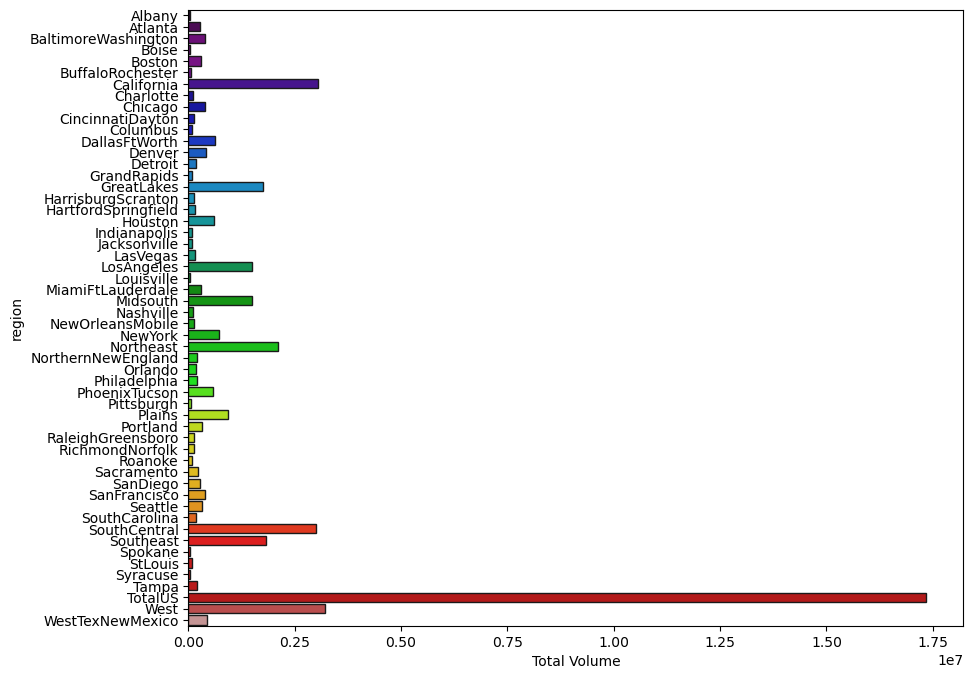

In [189]:
pt.figure(figsize=(10,8))
sb.barplot(y='region',x='Total Volume',data=adf,palette='nipy_spectral',edgecolor='0.1',errorbar=None)

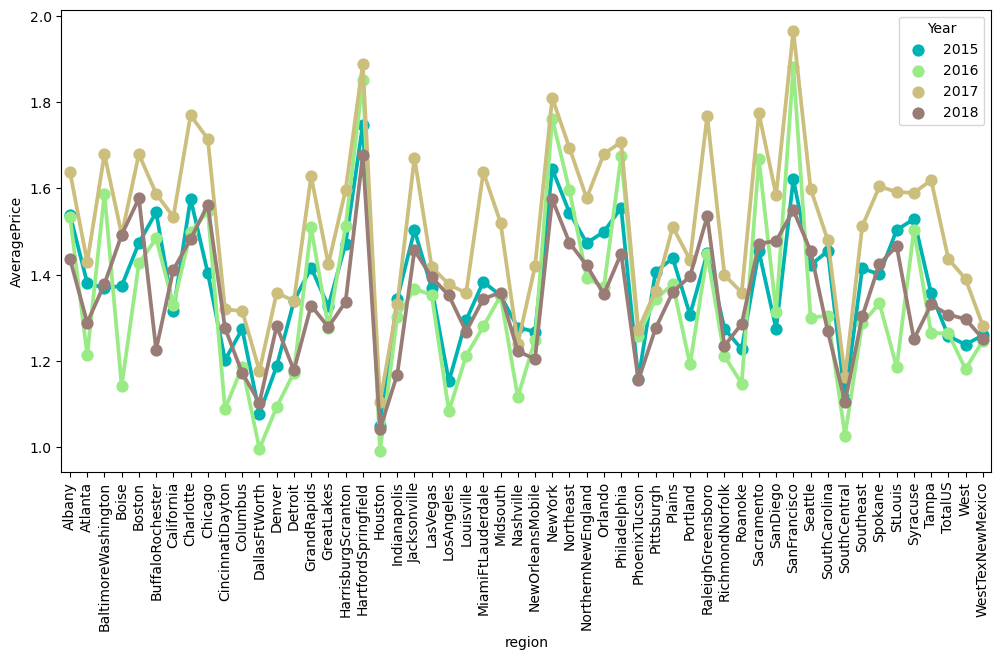

In [211]:
pt.figure(figsize=(12,6))
sb.pointplot(x='region',y='AveragePrice',hue='Year',data=adf,palette='terrain',errorbar=None)
pt.xticks(rotation=90)
pt.show()

## Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
oe=OrdinalEncoder()
le=LabelEncoder()
adf['region']=le.fit_transform(adf['region'])
adf['type']=oe.fit_transform(adf['type'].values.reshape(-1,1))

## Multivariate Analysis 

## Correlation using Heatmap

<Axes: >

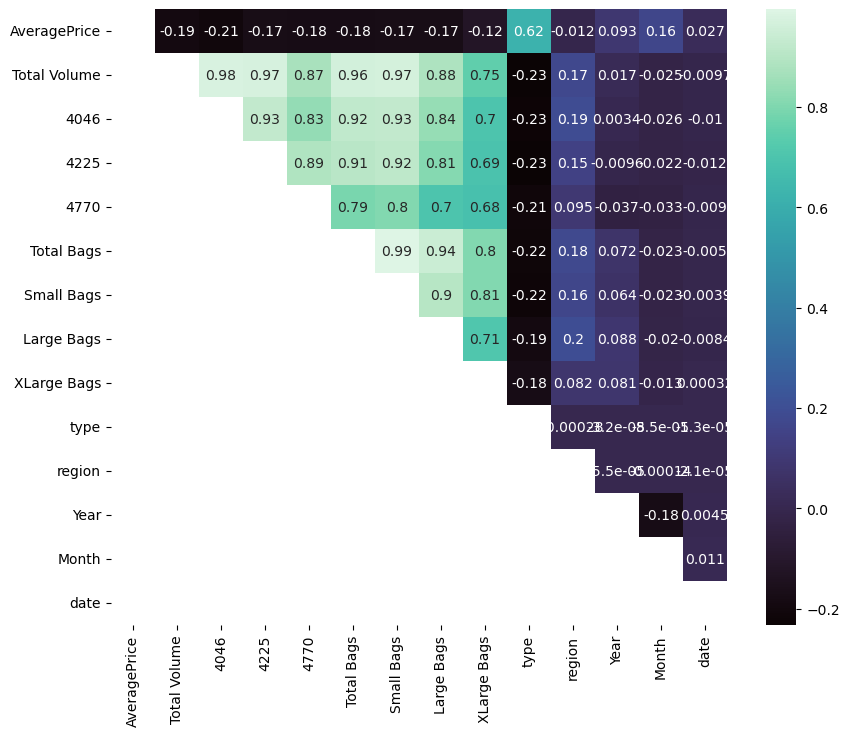

In [226]:
pt.figure(figsize=(10,8))
sb.heatmap(adf.corr(),mask=np.tril(adf.corr()),annot=True,square=True,cmap='mako')

### Pairplot 

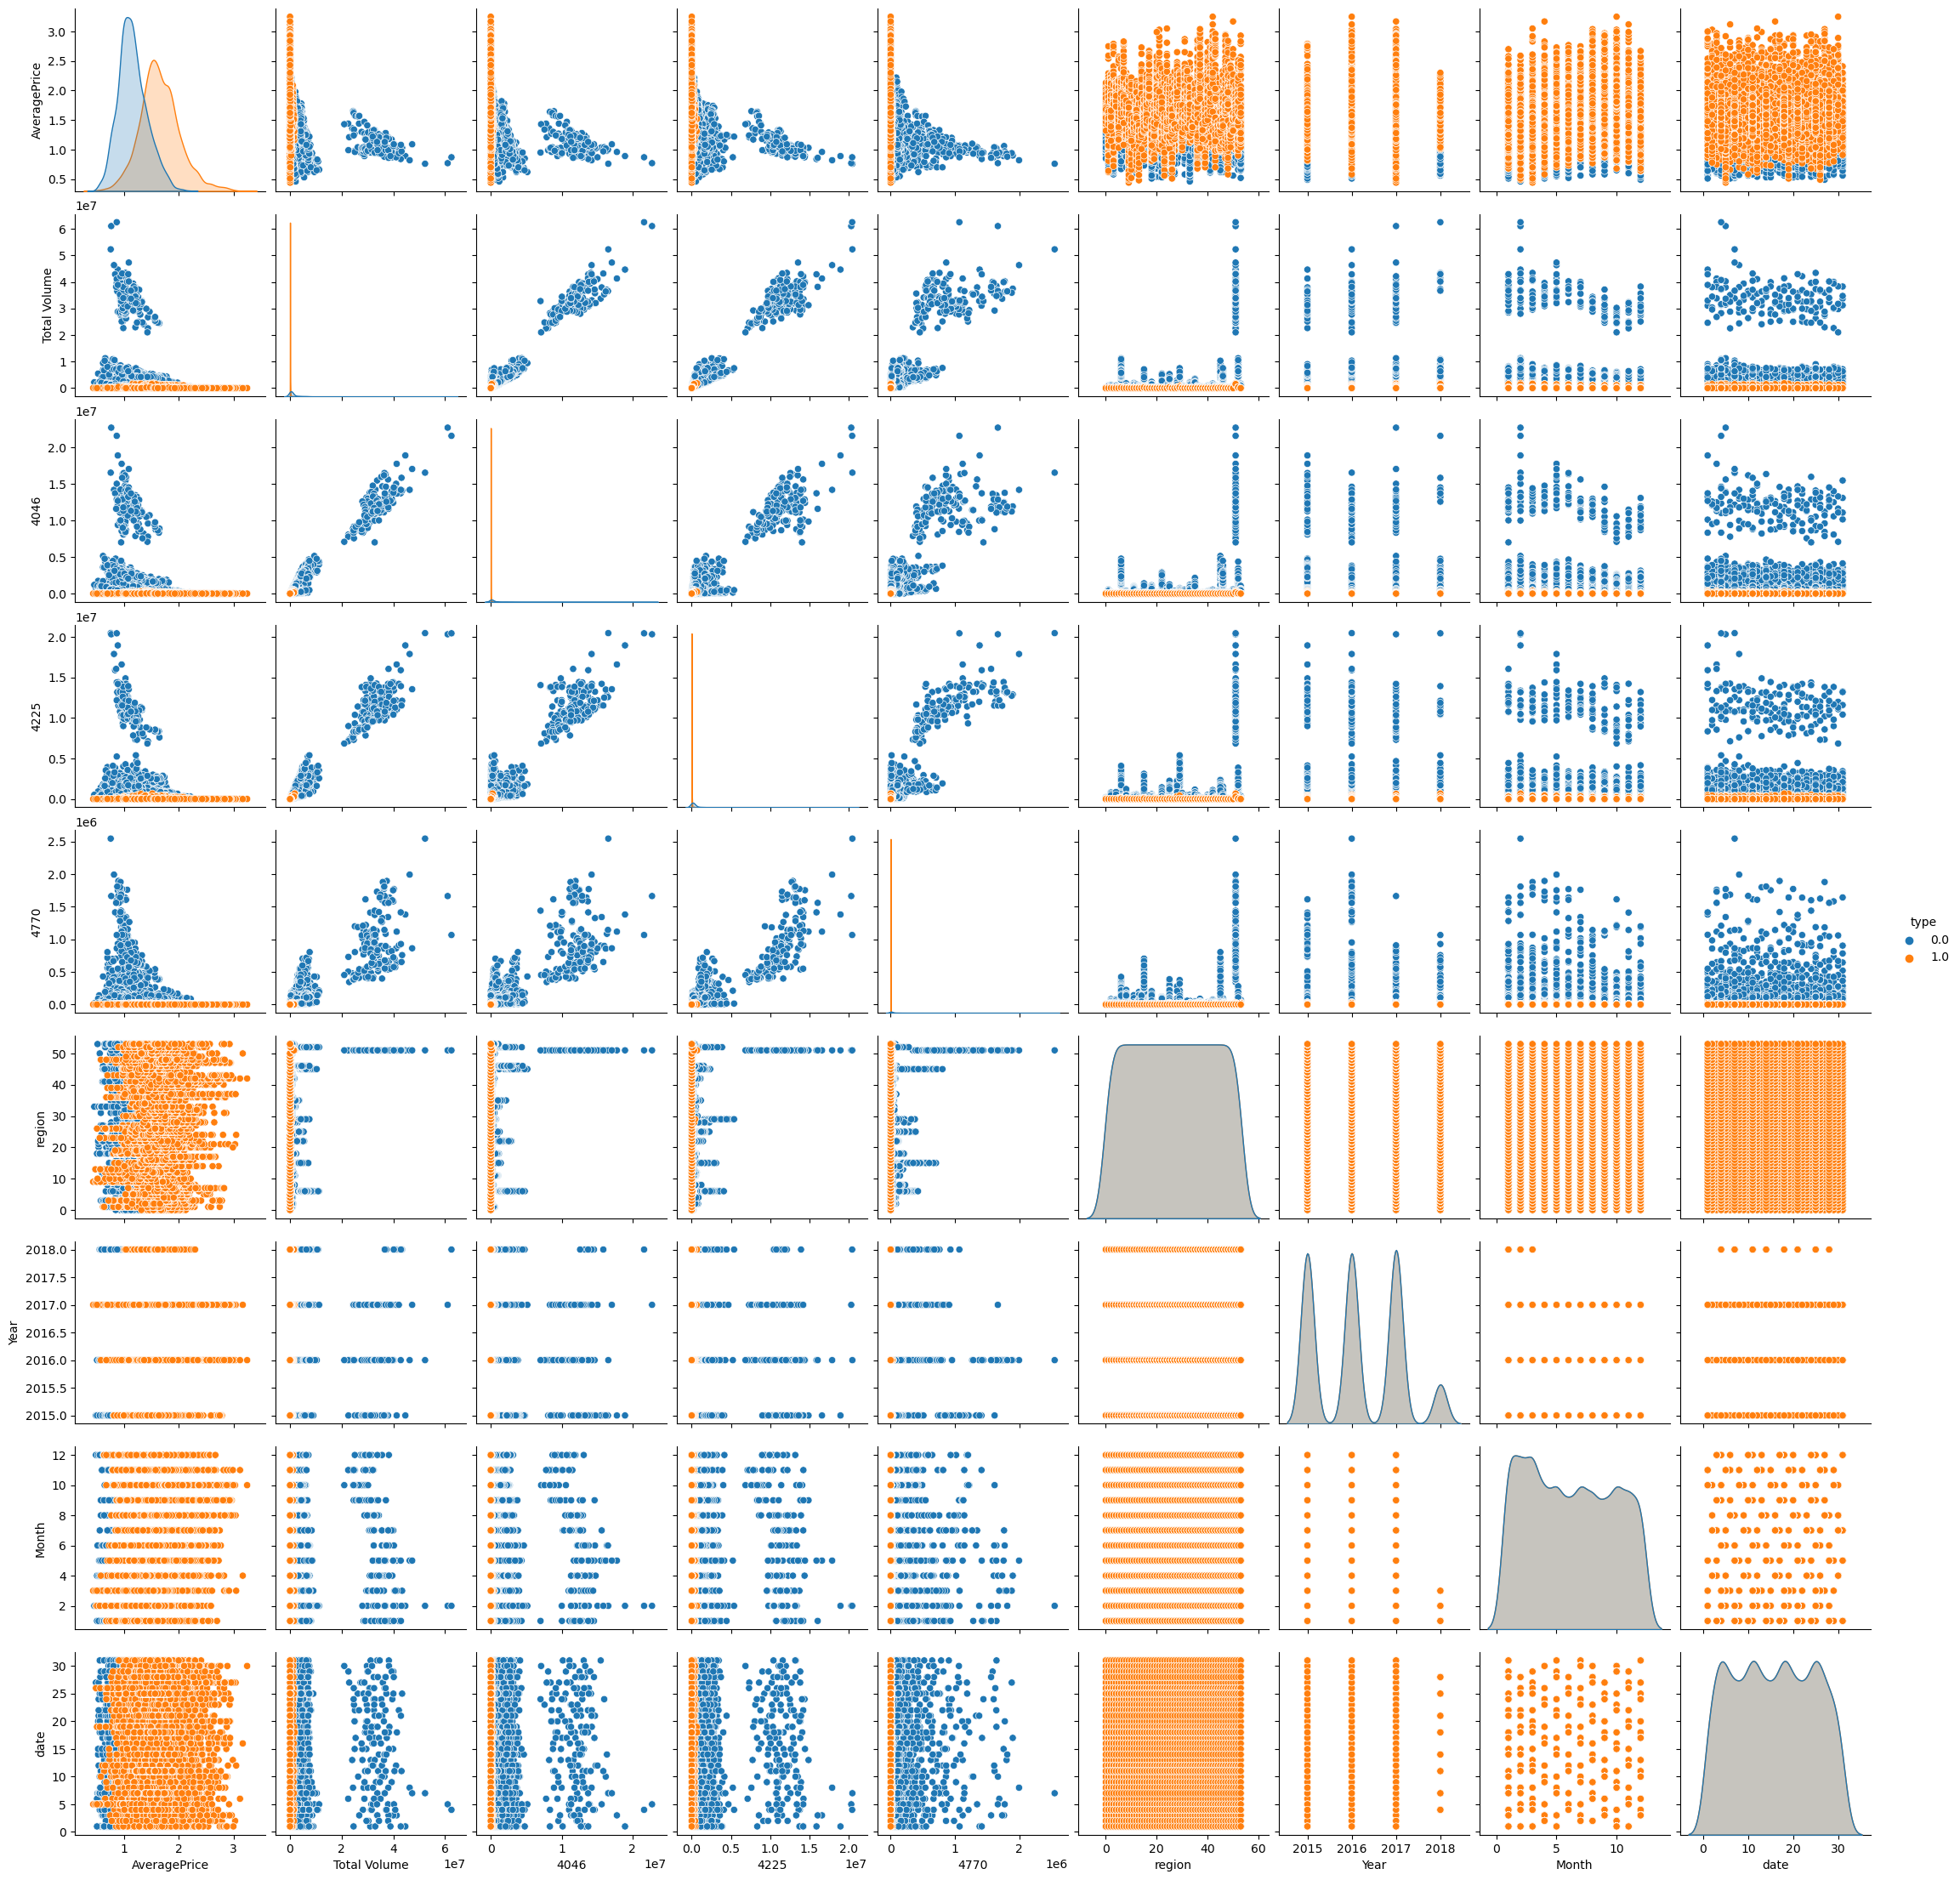

In [114]:
sb.pairplot(data=adf,hue='type')

## Dropping irrelevant columns

As total bags, small bags, large bags and xl bags are not present in the relevant columns in the problem statement we will drop them.

In [14]:
adf.drop(['Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
adf

,AveragePrice,Total Volume,4046,4225,4770,type,region,Year,Month,date
0,1.33,64236.62,1036.74,54454.85,48.16,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,1.0,53,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,1.0,53,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,1.0,53,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,1.0,53,2018,1,14


## Removing Outliers

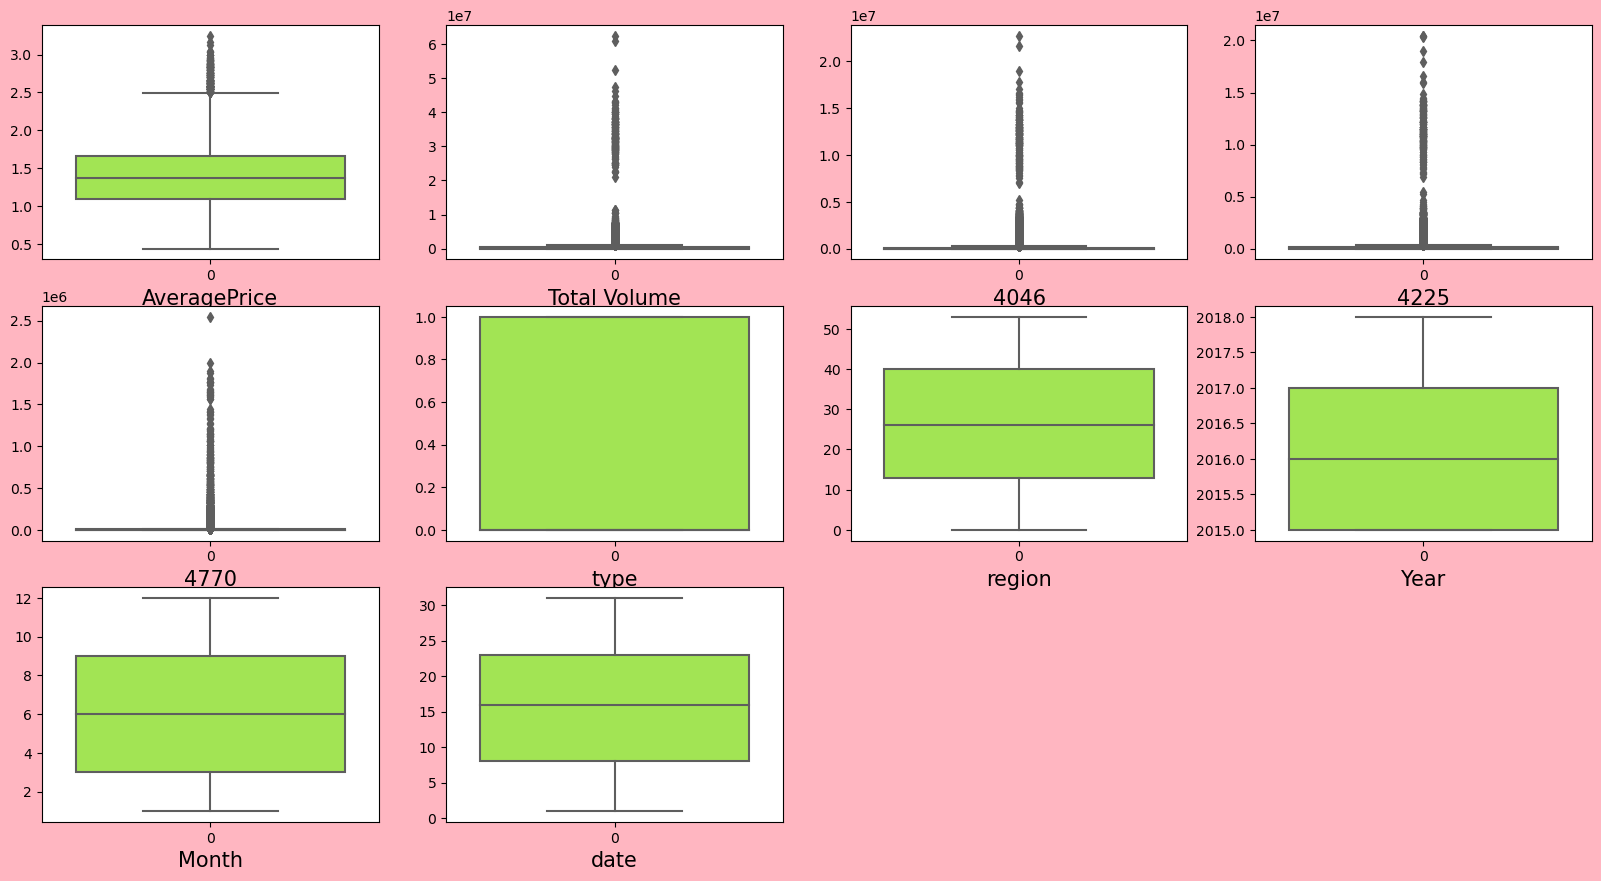

In [238]:
pt.figure(figsize=(20,14),facecolor='lightpink')
p=1
for c in adf:
    if p<=11:
        ax=pt.subplot(4,4,p)
        sb.boxplot(adf[c],palette='turbo')
        pt.xlabel(c,fontsize=15)
    p+=1

In [15]:
from scipy.stats import zscore
z = np.abs(zscore(adf))
adf1=adf[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers:",adf.shape)
print ("Shape of the dataframe after removing outliers:",adf1.shape)
print ("Data loss post outlier removal:",((adf.shape[0]-adf1.shape[0])/adf.shape[0]*100),'%')


Shape of the dataframe before removing outliers: (18249, 10)
Shape of the dataframe after removing outliers: (17838, 10)
Data loss post outlier removal: 2.25217820154529 %


As the data loss is below 10% it is acceptable

## Checking for Skewness 

AveragePrice    0.385429
Total Volume    3.661159
4046            4.422120
4225            4.104196
4770            4.759495
type           -0.016371
region          0.012062
Year            0.221195
Month           0.111748
date            0.012527
dtype: float64

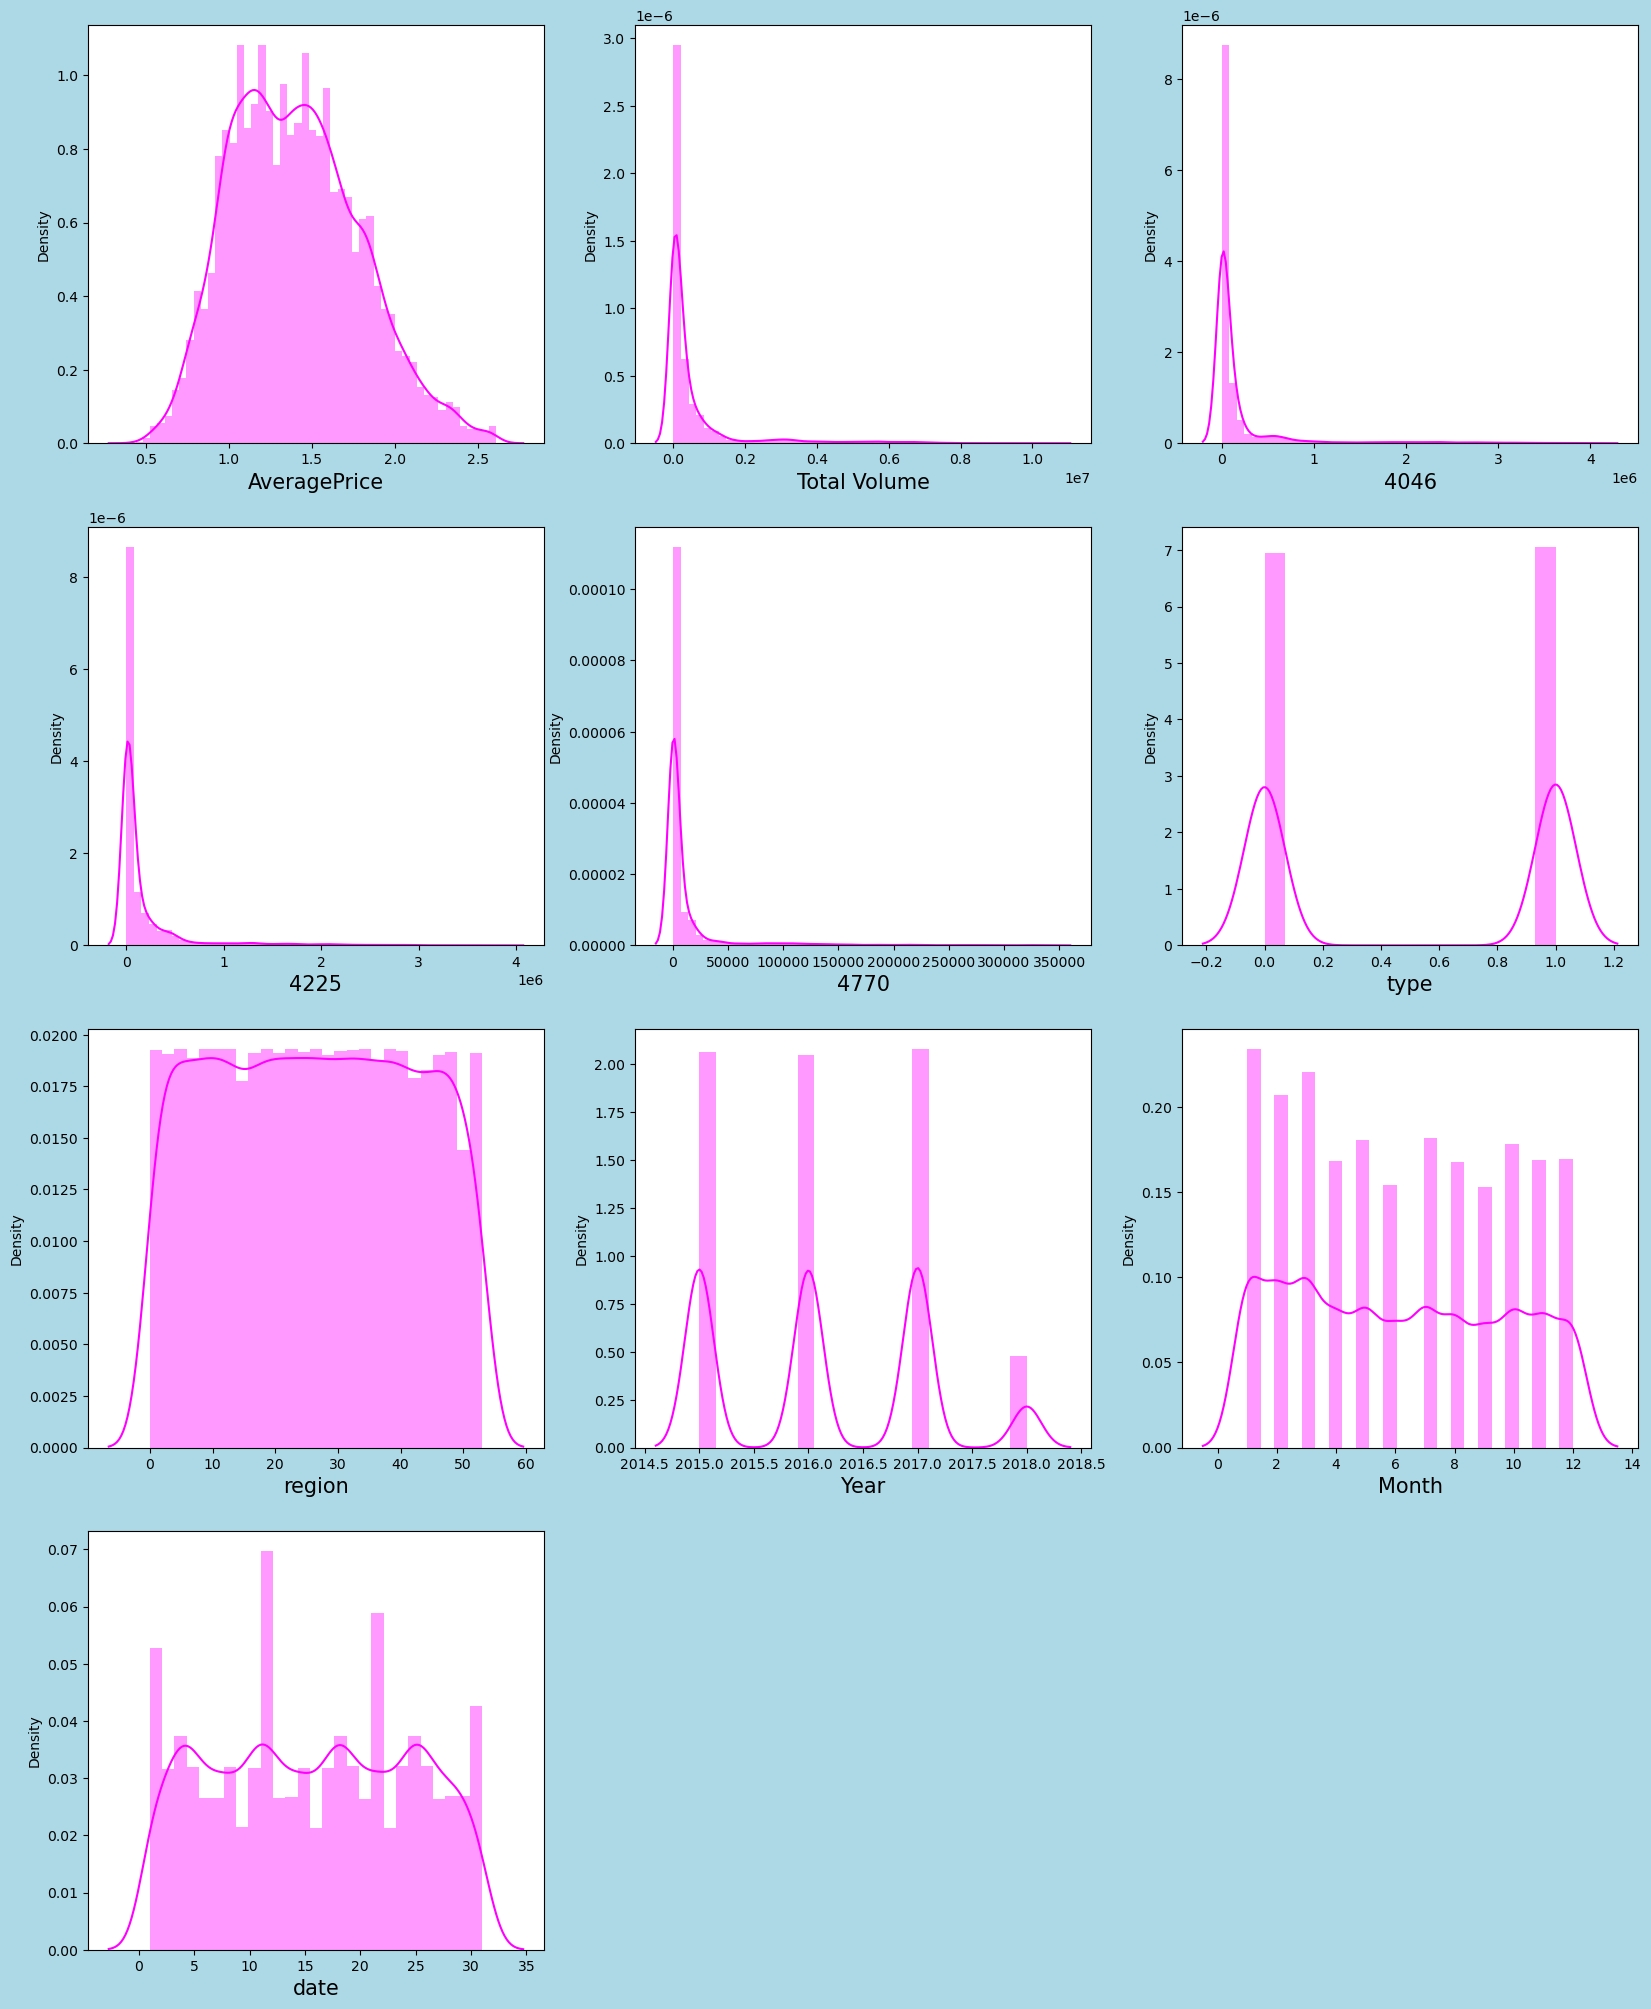

In [259]:
pt.figure(figsize=(20,25),facecolor='lightblue')
ptno=1

for c in adf1:
    if ptno<=12:
        ax=pt.subplot(4,3,ptno)
        sb.distplot(adf1[c],color='magenta')
        pt.xlabel(c,fontsize=15)
        
    ptno+=1
adf1.skew()

We  will remove skenewss from the non categorical columns

In [16]:
adf1['Total Volume']=np.log1p(adf1['Total Volume'])
adf1['4046']=np.log1p(adf1['4046'])
adf1['4225']=np.log1p(adf1['4225'])
adf1['4770']=np.log1p(adf1['4770'])

In [17]:
adf1.skew()

AveragePrice    0.385429
Total Volume   -0.029027
4046           -0.403825
4225           -0.590809
4770            0.061281
type           -0.016371
region          0.012062
Year            0.221195
Month           0.111748
date            0.012527
dtype: float64

Skewness is removed now

## Standard Scaling


In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [73]:
y=adf1['region']
x=adf1.drop(columns=['region'])
scaled_x=ss.fit_transform(x)

## Finding multicollinearity using VIF

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,AveragePrice,2.013319
1,Total Volume,15.599951
2,4046,4.850796
3,4225,6.659180
4,4770,3.763749
5,type,3.608516
6,Year,1.226705
7,Month,1.106287
8,date,1.001498


As total volume has vif value of more than 10 so we will remove it

In [74]:
y=adf1['region']
x=adf1.drop(columns=['region','Total Volume'])
scaled_x=ss.fit_transform(x)

In [75]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,AveragePrice,1.806142
1,4046,2.898833
2,4225,3.277544
3,4770,3.578696
4,type,3.571827
5,Year,1.068439
6,Month,1.090681
7,date,1.001496


VIF factor is within the acceptable range now

## Fitting the models now for classification problem

In [80]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [314]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8237668161434978 on Random State: 27


So the best random state is 27


In [76]:
 x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .25, random_state=27)

### Models with their metrics

In [82]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,scaled_x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*****************************************************************************')

 For GaussianNB()  Accuracy score is:  0.07331838565022422

 Confusion matrix: 
 [[11  0  1 ...  0  0  0]
 [ 9  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  1  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  2 40  0]
 [ 7  0  0 ...  0 42  0]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.03      0.12      0.05        90
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00        95
           3       0.11      0.04      0.06        93
           4       0.00      0.00      0.00        90
           5       0.00      0.00      0.00        85
           6       0.00      0.00      0.00        87
           7       0.36      0.16      0.22        74
           8       0.00      0.00      0.00        88
           9       0.13      0.19      0.15        90
          10       0.00      0.00      0.00        86
          11       0.00      0.00      0.00        86
          12       0.00      0.00

Cross Validation Score= 0.5339580339710928 

*****************************************************************************
 For KNeighborsClassifier()  Accuracy score is:  0.37690582959641256

 Confusion matrix: 
 [[34  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  3]
 [ 0  0 54 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  7  1 ...  0  0 15]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.28      0.38      0.32        90
           1       0.17      0.44      0.25        79
           2       0.32      0.57      0.41        95
           3       0.51      0.63      0.56        93
           4       0.34      0.46      0.39        90
           5       0.26      0.33      0.29        85
           6       0.51      0.61      0.55        87
           7       0.30      0.59      0.39        74
           8       0.75      0.64      0.69        88
           9       0.25      0.39      0.31        90
        

Cross Validation Score= 0.4517827532148833 

*****************************************************************************


We can see that the best working model is the Random forest classifer

##  Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],
      'criterion':['gini','entropy'],}
gs=GridSearchCV(rfc,param,cv=5,scoring='accuracy')
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 60, 'max_features': 'log2'}

In [30]:
final_model1=RandomForestClassifier(max_features='log2',criterion='entropy',max_depth=60)
final_model1.fit(x_train, y_train)
fmod_pred = final_model1.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 83.07174887892377


## Saving the classification model

In [31]:
import joblib
joblib.dump(final_model1,'Avocado_classification.obj')

['Avocado_classification.obj']

## Fitting the models for Regression Problem

In [100]:
y=adf1['AveragePrice']
x1=adf1.drop(columns=['AveragePrice','Total Volume'])
scaled_x1=ss.fit_transform(x1) #scaling

In [93]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [94]:
models_reg=[LinearRegression(),Ridge(),Lasso(),SVR(),XGBRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor()]

In [62]:
maxAcc = 0
maxRS = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x1,y,test_size = .25, random_state=i)
    for m in models_reg:
        m.fit(x_train,y_train)
        pred = m.predict(x_test)
        acc = r2_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8586398578819596 on Random State: 890


So the best random state is 890

In [95]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x1,y,test_size = .25, random_state=890)

## Every regression model with their metrics

In [96]:
for m in models_reg:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred))
    cvs=cross_val_score(m,x_train,y_train)
    print('Cross Validation Score=',cvs.mean(),'\n')

 For LinearRegression() 
R2 score : 1.0
Mean absolute error:  7.794860920157467e-15
Mean squared error:  1.0441334641562523e-28
Cross Validation Score= 1.0 

 For Ridge() 
R2 score : 0.9999999939708224
Mean absolute error:  0.0010407061206015981
Mean squared error:  1.4525383401910828e-06
Cross Validation Score= 0.9999999905873331 

 For Lasso() 
R2 score : 0.995801922999461
Mean absolute error:  0.8672940827266021
Mean squared error:  1.0113929714275465
Cross Validation Score= 0.9958021527033516 

 For SVR() 
R2 score : 0.9988590706884288
Mean absolute error:  0.291986779005348
Mean squared error:  0.27487058633525546
Cross Validation Score= 0.9984644914144525 

 For XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, import

So our best model is Random Forest Regressor, we will use hyperparameter tuning on it now

## Hyperparameter Tuning

In [99]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)]}
rfr=RandomForestRegressor()
gs=GridSearchCV(rfr,param,cv=5,scoring='accuracy')
gs.fit(x_train,y_train)
gs.best_params_

{'max_depth': 10, 'max_features': 'auto'}

In [101]:
final_model2=RandomForestClassifier(max_features='auto',max_depth=10)
final_model2.fit(x_train, y_train)
fmod_pred = final_model2.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 96.0762331838565


## Visualising the best fit line

Text(0.5, 1.0, 'Best Fit Line')

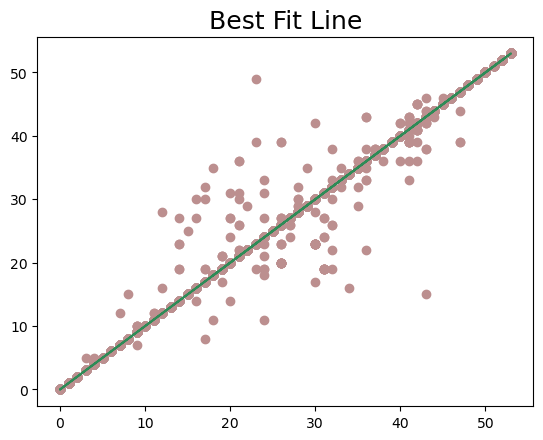

In [113]:
pt.scatter(x=y_test,y=fmod_pred,color='rosybrown')
pt.plot(y_test,y_test,color='seagreen')
pt.title('Best Fit Line',fontsize=18)

## Saving the Regressor Model 

In [107]:
joblib.dump(final_model2,'Avocado_regression.obj')

['Avocado_regression.obj']